# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente). ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? ¿Y si aumentamos la inversión en TV o periódicos?

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Carga de datos
df = pd.read_csv("data/Advertising.csv", index_col=0)
df


,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [110]:
df.isnull().values.any()


np.False_

In [111]:
df.loc[0, 'newpaper'] = 69.2
df['newpaper'] = df['newpaper'].astype(float)


In [112]:
df.describe()

,TV,radio,newpaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14022.500000
std,85.854236,14.846809,21.778621,5217.456566
min,0.700000,0.000000,0.300000,1600.000000
25%,74.375000,9.975000,12.750000,10375.000000
50%,149.750000,22.900000,25.750000,12900.000000
75%,218.825000,36.525000,45.100000,17400.000000
max,296.400000,49.600000,114.000000,27000.000000


In [113]:
corr = df.corr(numeric_only=True)
corr

,TV,radio,newpaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newpaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


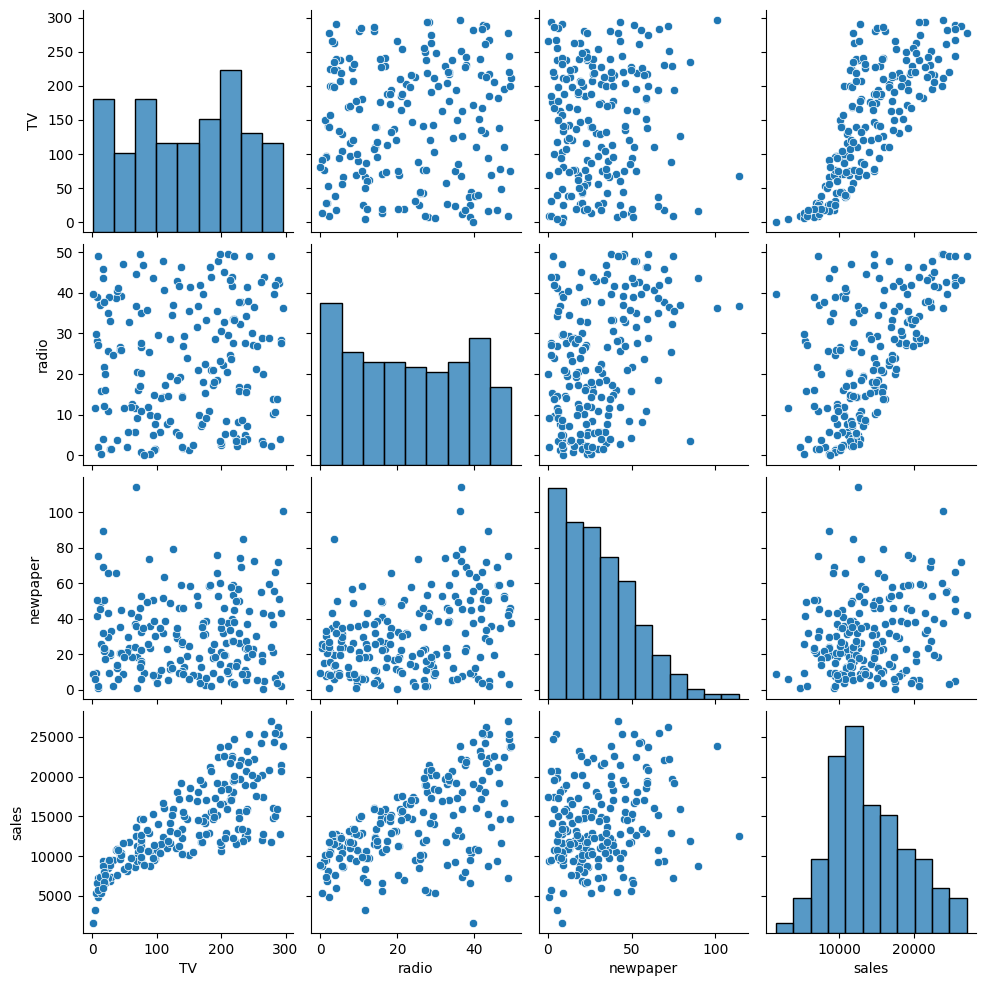

In [114]:
sns.pairplot(df);

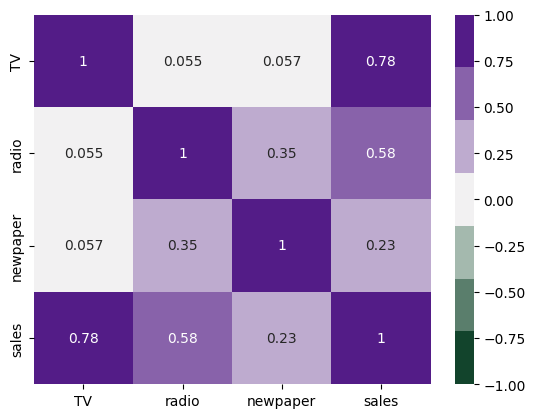

In [115]:
sns.heatmap(df.corr(),
           vmin=-1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

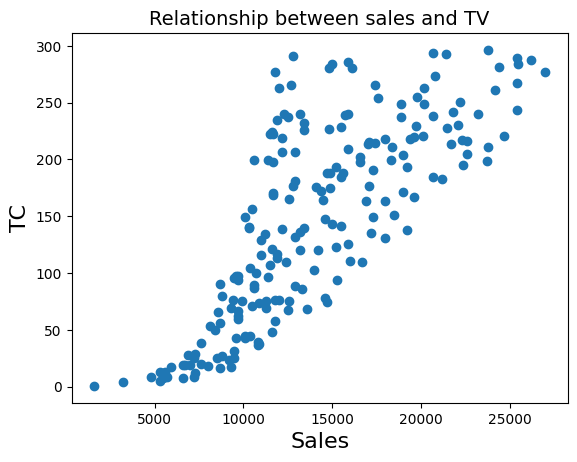

In [116]:
plt.scatter(df['sales'], df['TV'])
plt.xlabel('Sales', fontsize=16)
plt.ylabel('TC', fontsize=16)
plt.title("Relationship between sales and TV", fontsize=14)
plt.show()

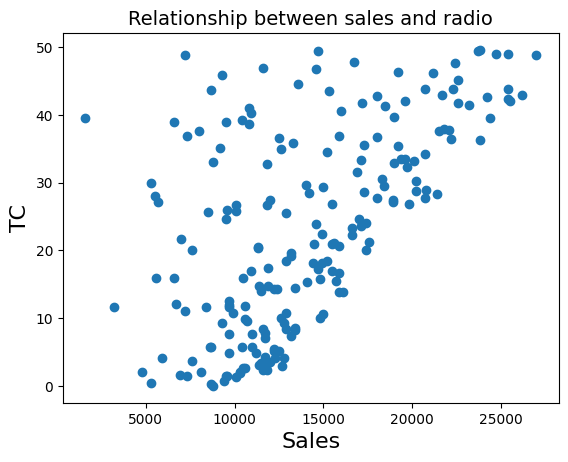

In [117]:
plt.scatter(df['sales'], df['radio'])
plt.xlabel('Sales', fontsize=16)
plt.ylabel('TC', fontsize=16)
plt.title("Relationship between sales and radio", fontsize=14)
plt.show()

In [118]:
X = df.drop(columns=['sales'])
y = df['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42)

In [119]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [120]:
from sklearn import linear_model, metrics

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))

Train MSE: 2479355.1789057874
Test MSE: 3796797.2367152213


In [121]:
ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=0.2))
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("Ridge Train MSE:", mean_squared_error(y_train, ridge_model.predict(X_train)))
print("Ridge Test MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Ridge Test R2:", r2_score(y_test, y_pred_ridge))

Ridge Train MSE: 2479399.0979011264
Ridge Test MSE: 3797296.546130374
Ridge Test R2: 0.8609283641877166


In [122]:
import numpy as np

n_alphas = 100
alphas = np.logspace(0, 5, n_alphas)

print(f"Variaremos los valores entre {np.min(alphas)} y {np.max(alphas)}")

Variaremos los valores entre 1.0 y 100000.0


In [123]:
coef_ridge = []
err_ridge = []
baseline = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [124]:
print(f"Hemos obtenido un valor mínimo de {min(err_ridge)}")
print(f"Hemos obtenido un valor mínimo de {min(baseline)}")

Hemos obtenido un valor mínimo de 3530312.2910082936
Hemos obtenido un valor mínimo de 3796797.2367152213


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\jonol\AppData\Local\Temp\ipykernel_2728\765433681.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


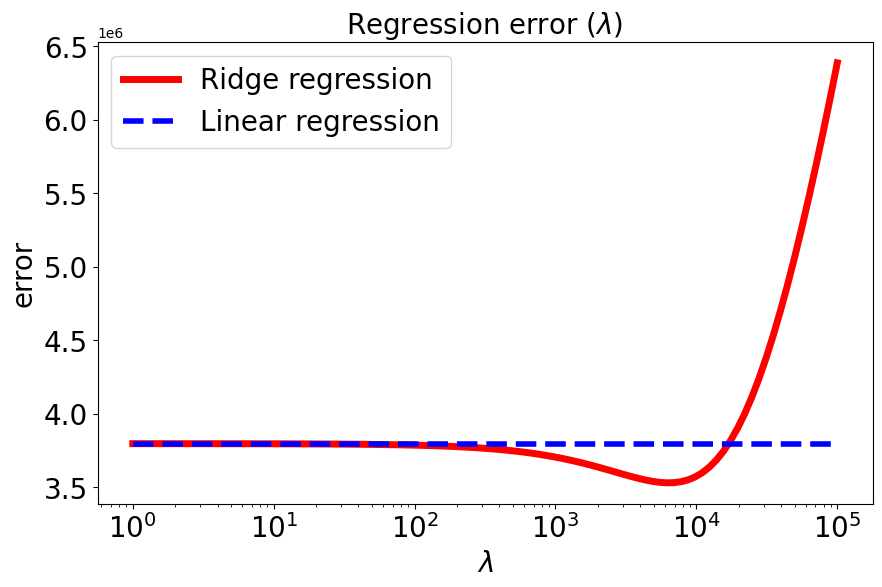

In [125]:
plt.figure(figsize=(10,6))
font = 20

ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\lambda$)', fontsize=font)
plt.show()


In [126]:
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 6000) 
ridgeR.fit(X_train, y_train) 
y_pred_train = ridgeR.predict(X_train)
y_pred_ridge = ridgeR.predict(X_test)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))
print("Ridge Test R2:", r2_score(y_test, y_pred_ridge))


Train MSE: 2728848.6149
Test MSE: 3530659.6827
Ridge Test R2: 0.8706936338506299


In [127]:
from sklearn.linear_model import Lasso

n_alphas = 100
alphas1 = np.logspace(0, 6, n_alphas)

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))
print("-"*50)

y_pred_train_lasso = lassoR.predict(X_train)
y_pred_test_lasso = lassoR.predict(X_test)
    
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))
print("Lasso Test R2: %0.4f" % r2_score(y_test, y_pred_test_lasso))



Train MSE sin regularización: 2479355.18
Test MSE sin regularización: 3796797.24
--------------------------------------------------
Train MSE: 2479355.1790
Test MSE: 3796785.2841
Lasso Test R2: 0.8609


In [128]:
lasso = Lasso(fit_intercept=False) # No ajustar el c0

coef_lasso = []
err_lasso = []
for a in alphas1:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\jonol\AppData\Local\Temp\ipykernel_2728\997259869.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


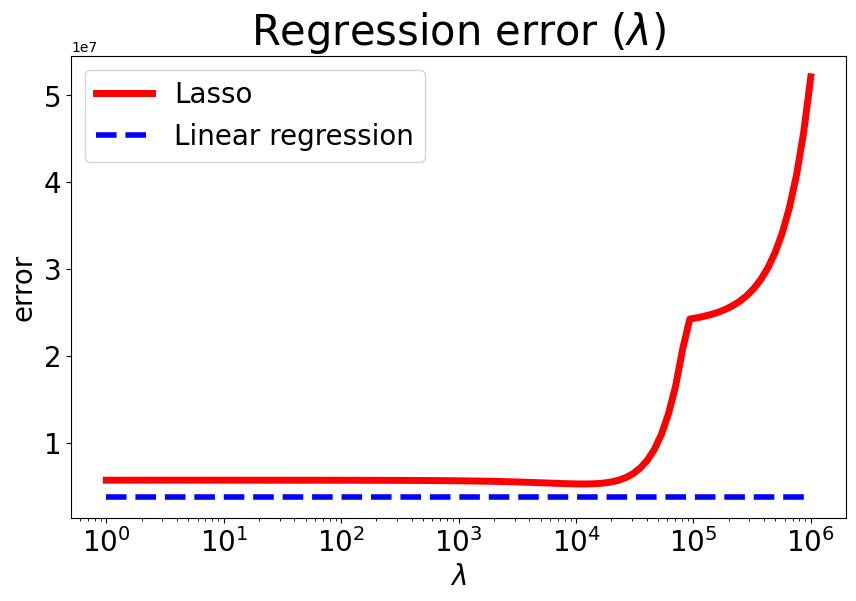

In [129]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas1, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas1, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

Tras comprombar un amplio rango de alfas (desde -3 a casi 10). El error de regresion sigue siendo mayor que el modelo sin regularizar. Lasso no nos sirve.

In [130]:
from sklearn.linear_model import ElasticNet

n_alphas = 100
alphas2 = np.logspace(0, 3, n_alphas)

coef_eln = []
err_eln = []
baseline = []
for a in alphas2:
    elastic_net = ElasticNet(alpha = a, l1_ratio=0.9)
    elastic_net.fit(X_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)

In [131]:
min(err_eln)

np.float64(3509696.841286969)

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\jonol\AppData\Local\Temp\ipykernel_2728\2096525338.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


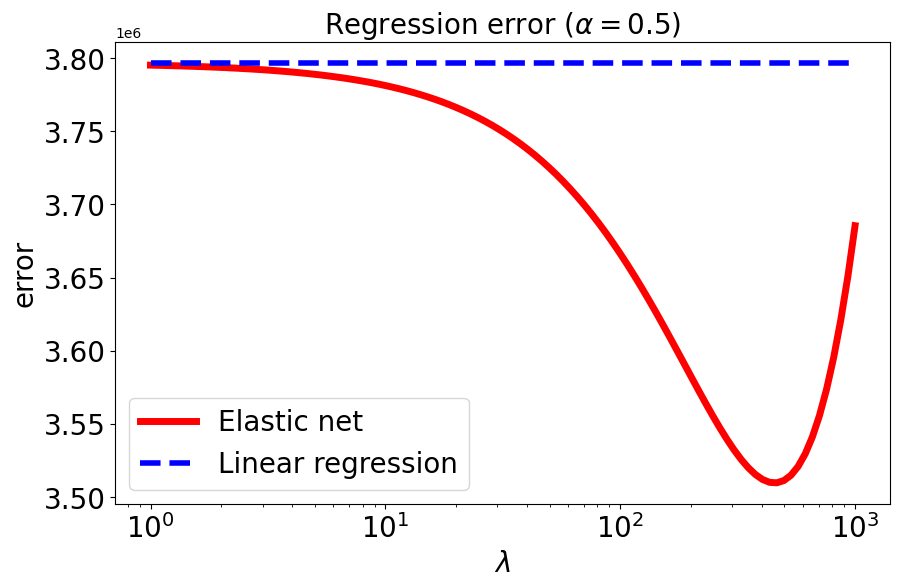

In [132]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas2, err_eln, linewidth=5, color='red', label="Elastic net")
ax.plot(alphas2, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=font)
plt.show()

In [137]:
elastic_net = ElasticNet(alpha = 450, l1_ratio=0.9)
elastic_net.fit(X_train, y_train) 

y_pred_train_enet = elastic_net.predict(X_train)
y_pred_test_enet = elastic_net.predict(X_test)


print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))
print("ElasticNet Test R2: %0.4f" % r2_score(y_test, y_pred_test_enet))


Train MSE: 2770225.8813
Test MSE: 3509622.7137
ElasticNet Test R2: 0.8715


In [134]:
print("Linear regression error:   %0.4f" % baseline_error)    
print("Minimun ridge error:       %0.4f" % min(err_ridge))
print("Minimum lasso error:       %0.4f" % min(err_lasso))
print("Minimum elastic net error: %0.4f" % min(err_eln))

Linear regression error:   3796797.2367
Minimun ridge error:       3530312.2910
Minimum lasso error:       5275823.4323
Minimum elastic net error: 3509696.8413


Finalmente nos quedamos con ElasticNet ya que es el que menos error nos proporciona.

In [135]:
print("Intercepto:", elastic_net.intercept_)
print("Coeficientes:", elastic_net.coef_)

Intercepto: 3408.7943099887216
Coeficientes: [ 44.11062982 160.09046668  13.91856336]


### Formula

$$
\text{Ventas} = 3408.79 + 44.11 \cdot \text{TV} + 160.09 \cdot \text{Radio} + 13.92 \cdot \text{Newspaper}
$$


Si inviertimos 1 unidad más en:

Radio → las ventas subiran en 160.09 unidades.

TV → las ventas subiran en 44.11 unidades.

Newspaper → las ventas subiran en 13.92 unidades.
